In [ ]:
!pip install prophet

In [1]:
import pandas as pd
import math
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from prophet import Prophet
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize']=(16,8)
plt.style.use('ggplot')

In [56]:
prices_df = yf.download('^JKSE', start='2019-01-01', end=None)
print(prices_df.head())

[*********************100%***********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-01-02  6197.871094  6205.895020  6164.833984  6181.174805  6181.174805   
2019-01-03  6176.151855  6221.009766  6176.151855  6221.009766  6221.009766   
2019-01-04  6211.096191  6274.540039  6200.854004  6274.540039  6274.540039   
2019-01-07  6317.625977  6354.757812  6287.224121  6287.224121  6287.224121   
2019-01-08  6292.263184  6316.240234  6251.375977  6262.847168  6262.847168   

              Volume  
Date                  
2019-01-02  52797800  
2019-01-03  72166700  
2019-01-04  80858100  
2019-01-07  90278300  
2019-01-08  90537400  


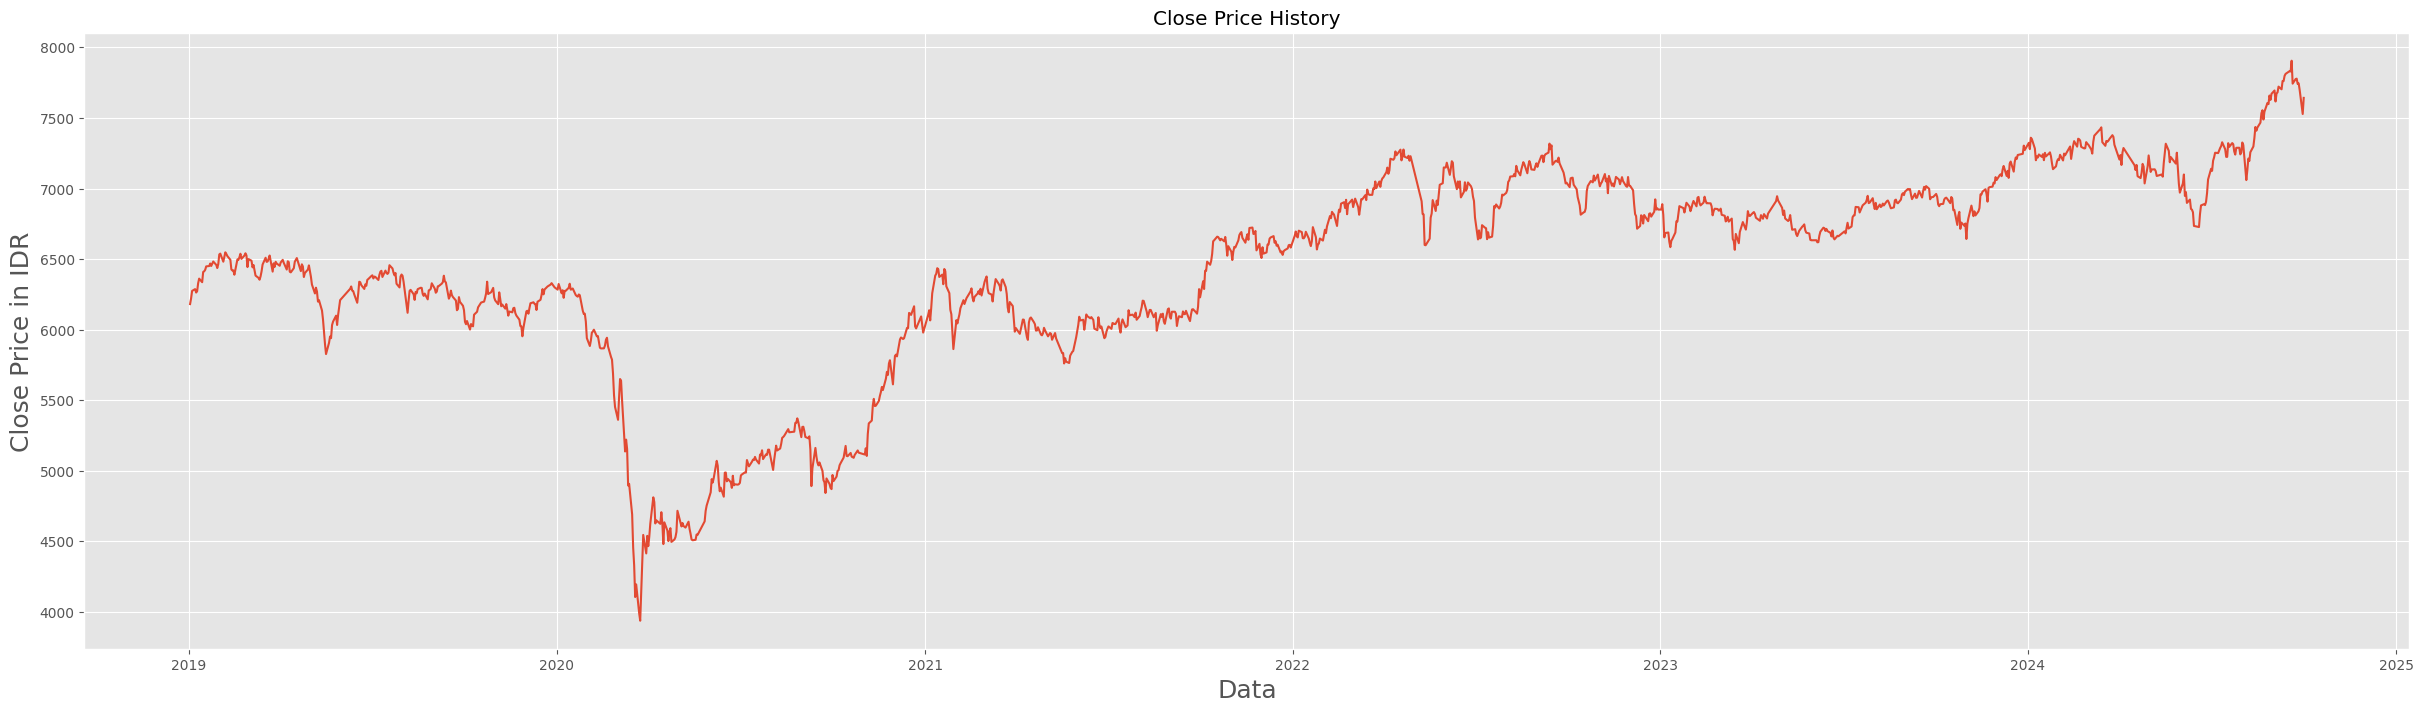

In [57]:
plt.figure(figsize=(30,8))
plt.title('Close Price History')
plt.plot(prices_df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price in IDR', fontsize=18)
plt.show()

In [58]:
idx = pd.date_range(prices_df.index.min(), prices_df.index.max(), freq='D')
prices_df = prices_df.reindex(idx)
prices_df = prices_df[['Close']]
prices_df = prices_df.rename_axis('Date')

test_size = 100

data_train = prices_df.iloc[:-test_size, :]
data_test = prices_df.iloc[-test_size:, :]

In [59]:
prices_df

,Close
Date,
2019-01-02,6181.174805
2019-01-03,6221.009766
2019-01-04,6274.540039
2019-01-05,NaN
2019-01-06,NaN
...,...
2024-09-27,7696.916016
2024-09-28,NaN
2024-09-29,NaN


In [60]:
data_train.describe()

,Close
count,1324.000000
mean,6387.921845
std,691.200897
min,3937.632080
25%,6089.382324
50%,6496.408447
75%,6900.162598
max,7433.314941


,ds,y
1995,2024-06-19,6726.918945
1996,2024-06-20,6819.320801
1997,2024-06-21,6879.978027
1998,2024-06-22,NaN
1999,2024-06-23,NaN


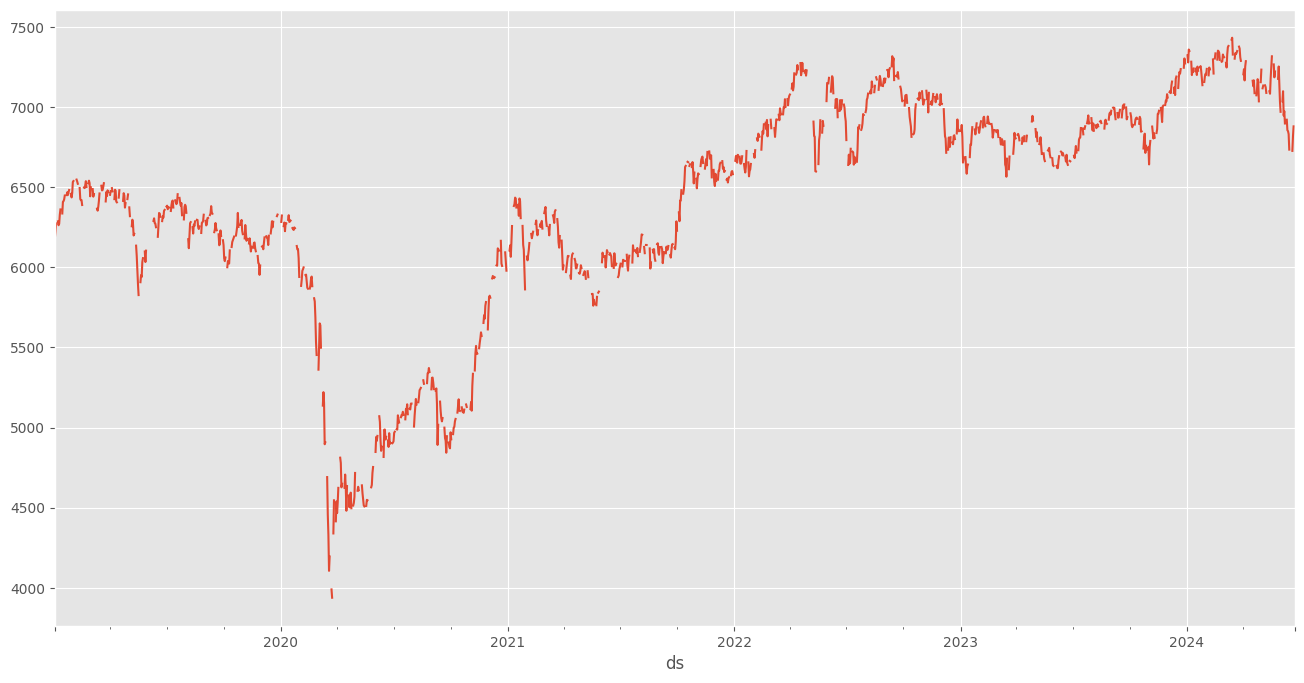

In [61]:
df = data_train.reset_index()
df=df.rename(columns={'Date':'ds', 'Close':'y'})
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds').y.plot()
df.tail(5)

In [62]:
model = Prophet(daily_seasonality=True)
model.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqf_dk65/xqjyij4y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqf_dk65/osqjpe6e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54562', 'data', 'file=/tmp/tmpzqf_dk65/xqjyij4y.json', 'init=/tmp/tmpzqf_dk65/osqjpe6e.json', 'output', 'file=/tmp/tmpzqf_dk65/prophet_modelcg1ylwyh/prophet_model-20241001150457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:04:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:04:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [63]:
future = model.make_future_dataframe(periods= int((data_test.index[-1] - data_train.index[-1]).days),freq = 'd')
future.tail(14)

,ds
1410,2024-09-16
1411,2024-09-17
1412,2024-09-18
1413,2024-09-19
1414,2024-09-20
1415,2024-09-21
1416,2024-09-22
1417,2024-09-23
1418,2024-09-24
1419,2024-09-25


In [64]:
# Eliminate weekend from future dataframe
future['day'] = future['ds'].dt.weekday
future = future[(future['day']<5)]
future.tail(14)

,ds,day
1404,2024-09-10,1
1405,2024-09-11,2
1406,2024-09-12,3
1407,2024-09-13,4
1410,2024-09-16,0
1411,2024-09-17,1
1412,2024-09-18,2
1413,2024-09-19,3
1414,2024-09-20,4
1417,2024-09-23,0


In [65]:
forecast = model.predict(future)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

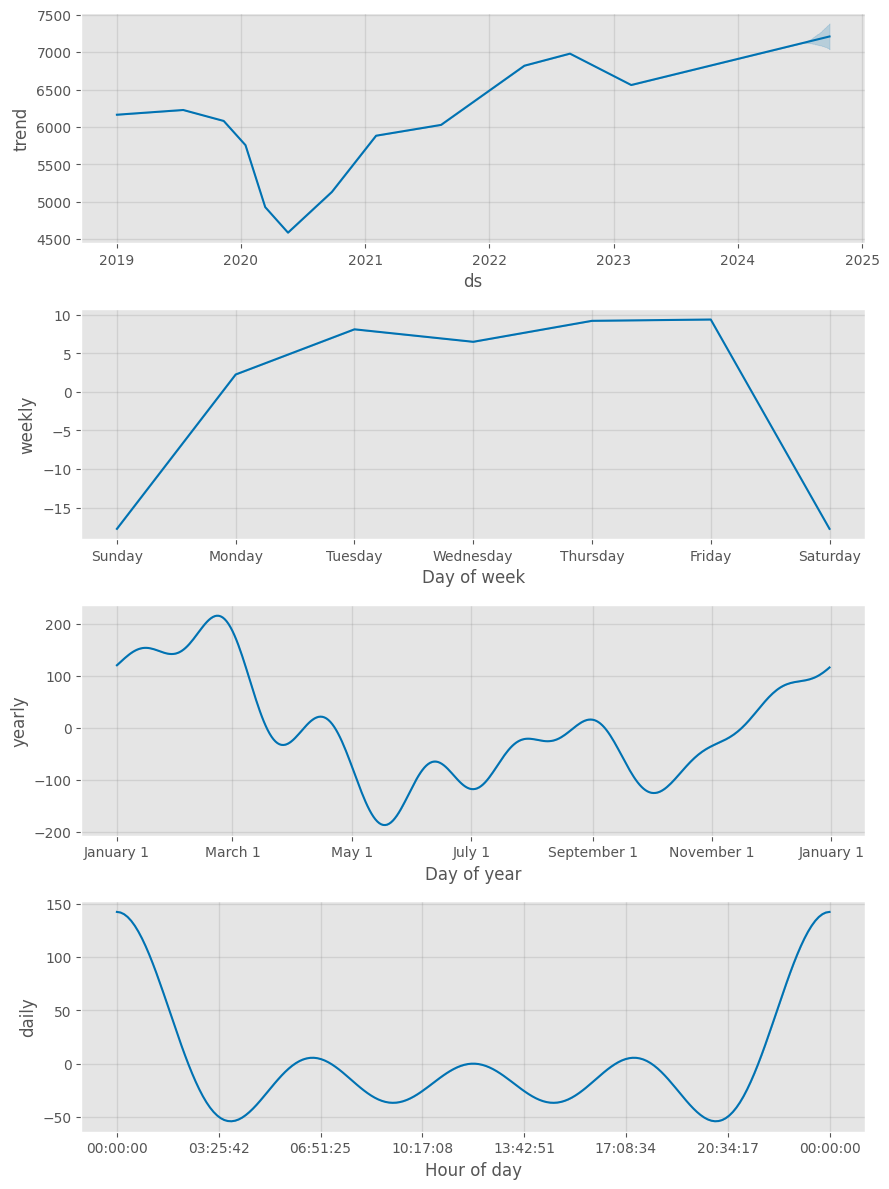

In [66]:
fig = model.plot_components(forecast)

In [67]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2019-01-02,6433.973861,6229.397295,6622.489043
1,2019-01-03,6440.487965,6223.899461,6648.893583
2,2019-01-04,6444.446323,6234.868454,6633.576527
3,2019-01-07,6448.144472,6240.616404,6661.486327
4,2019-01-08,6457.275399,6266.105016,6664.395869
...,...,...,...,...
1389,2024-09-23,7247.991075,6965.757872,7520.402751
1390,2024-09-24,7249.985089,6980.371874,7499.420871
1391,2024-09-25,7245.010232,6977.229175,7504.146496
1392,2024-09-26,7244.927893,6959.769642,7502.915036


In [68]:
new_df = df.set_index('ds')
new_forecast = forecast.set_index('ds')
viz_df = prices_df.join(new_forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

In [69]:
viz_df

,Close,yhat,yhat_lower,yhat_upper
2019-01-02,6181.174805,6433.973861,6229.397295,6622.489043
2019-01-03,6221.009766,6440.487965,6223.899461,6648.893583
2019-01-04,6274.540039,6444.446323,6234.868454,6633.576527
2019-01-05,NaN,NaN,NaN,NaN
2019-01-06,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-09-27,7696.916016,7242.870912,6959.790100,7515.393061
2024-09-28,NaN,NaN,NaN,NaN
2024-09-29,NaN,NaN,NaN,NaN
2024-09-30,7527.929199,NaN,NaN,NaN


In [70]:
prices_df.index = pd.to_datetime(prices_df.index) #make sure our index as a datetime object
connect_date = data_train.index[-2] #select the 2nd to last date
connect_date

Timestamp('2024-06-22 00:00:00')

In [71]:
mask = (new_forecast.index > connect_date)
predict_df = new_forecast.loc[mask]

In [72]:
predict_df.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2024-06-24,7103.691499,6942.375368,7340.672161,7103.691499,7103.691499,43.513886,43.513886,43.513886,142.166608,142.166608,...,2.267209,2.267209,2.267209,-100.919931,-100.919931,-100.919931,0.0,0.0,0.0,7147.205385
2024-06-25,7104.805111,6955.325398,7342.654737,7104.805111,7104.805111,45.523519,45.523519,45.523519,142.166608,142.166608,...,8.130260,8.130260,8.130260,-104.773349,-104.773349,-104.773349,0.0,0.0,0.0,7150.328630
2024-06-26,7105.918722,6940.711115,7356.523617,7105.918722,7105.918722,40.381639,40.381639,40.381639,142.166608,142.166608,...,6.509753,6.509753,6.509753,-108.294723,-108.294723,-108.294723,0.0,0.0,0.0,7146.300361
2024-06-27,7107.032334,6936.531101,7352.543362,7107.032334,7107.032334,40.001693,40.001693,40.001693,142.166608,142.166608,...,9.232028,9.232028,9.232028,-111.396944,-111.396944,-111.396944,0.0,0.0,0.0,7147.034026
2024-06-28,7108.145945,6950.733456,7349.378286,7108.145945,7108.145945,37.566696,37.566696,37.566696,142.166608,142.166608,...,9.402366,9.402366,9.402366,-114.002278,-114.002278,-114.002278,0.0,0.0,0.0,7145.712642


In [73]:
viz_df = prices_df.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
viz_df.tail(10)

,Close,yhat,yhat_lower,yhat_upper
2024-09-22,NaN,NaN,NaN,NaN
2024-09-23,7775.730957,7247.991075,6965.757872,7520.402751
2024-09-24,7778.491211,7249.985089,6980.371874,7499.420871
2024-09-25,7740.901855,7245.010232,6977.229175,7504.146496
2024-09-26,7744.516113,7244.927893,6959.769642,7502.915036
2024-09-27,7696.916016,7242.870912,6959.790100,7515.393061
2024-09-28,NaN,NaN,NaN,NaN
2024-09-29,NaN,NaN,NaN,NaN
2024-09-30,7527.929199,NaN,NaN,NaN
2024-10-01,7642.132812,NaN,NaN,NaN


In [74]:
viz_df.tail(10)

,Close,yhat,yhat_lower,yhat_upper
2024-09-22,NaN,NaN,NaN,NaN
2024-09-23,7775.730957,7247.991075,6965.757872,7520.402751
2024-09-24,7778.491211,7249.985089,6980.371874,7499.420871
2024-09-25,7740.901855,7245.010232,6977.229175,7504.146496
2024-09-26,7744.516113,7244.927893,6959.769642,7502.915036
2024-09-27,7696.916016,7242.870912,6959.790100,7515.393061
2024-09-28,NaN,NaN,NaN,NaN
2024-09-29,NaN,NaN,NaN,NaN
2024-09-30,7527.929199,NaN,NaN,NaN
2024-10-01,7642.132812,NaN,NaN,NaN


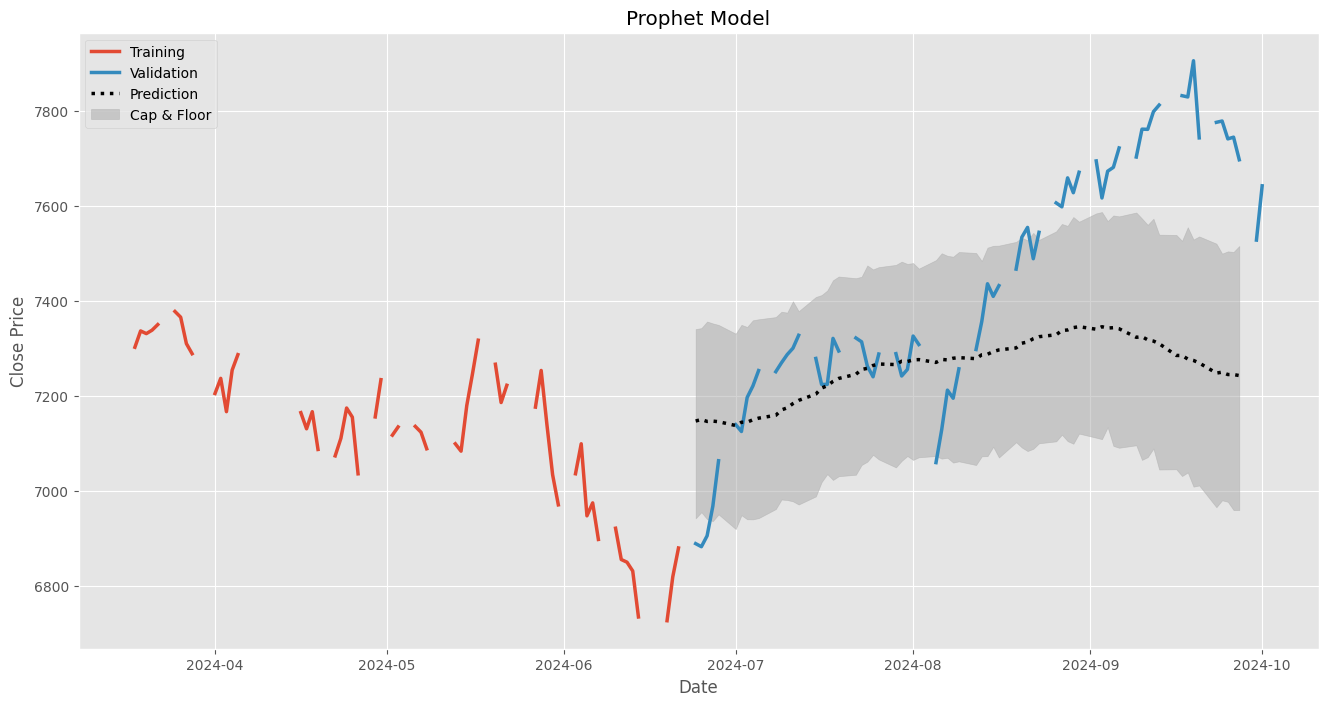

In [75]:
#viz = viz_df.iloc[-400:,:]
fig, ax1 = plt.subplots()

# Plot with bold lines by setting the linewidth parameter
ax1.plot(data_train.iloc[-100:, :].Close, linewidth=2.5)  # Bold training line
ax1.plot(data_test.Close, linewidth=2.5)  # Bold validation line
ax1.plot(predict_df.yhat, color='black', linestyle=':', linewidth=2.5)  # Bold prediction line

# Fill between for cap and floor
ax1.fill_between(predict_df.index, predict_df['yhat_upper'], predict_df['yhat_lower'], alpha=0.5, color='darkgray')

# Set title and labels
ax1.set_title('Prophet Model')
ax1.set_ylabel('Close Price')
ax1.set_xlabel('Date')

# Add legend
L = ax1.legend(['Training', 'Validation', 'Prediction', 'Cap & Floor'])

plt.show()

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


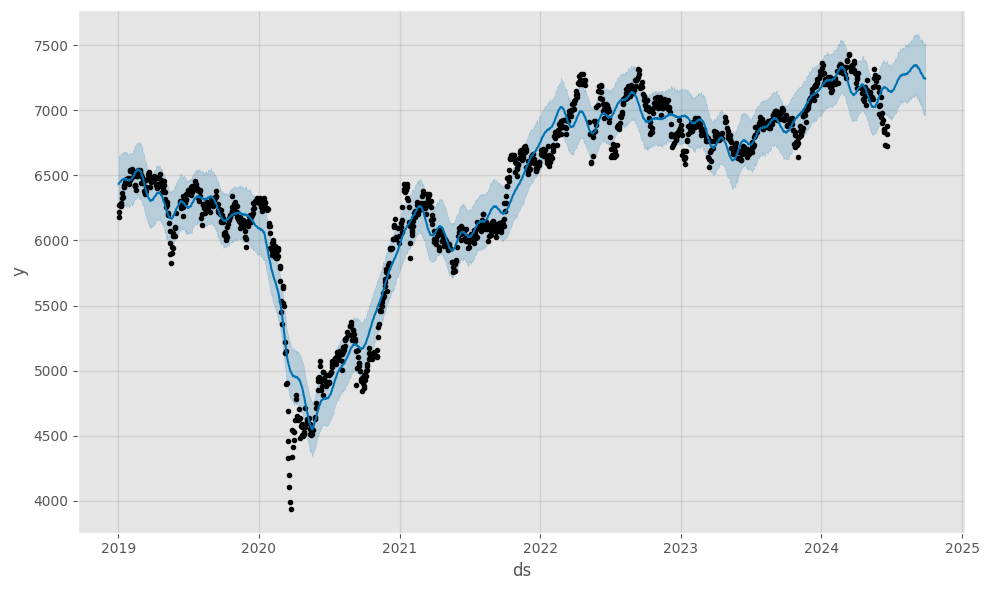

In [76]:
fig1 = model.plot(forecast)